In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import urllib
import requests
import re
import json
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
client_id = "cfIwT1j0qtvQJElOwf1k"
client_secret = "unlWsxfFoB"

In [4]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2019-02-01\",\"endDate\":\"2020-07-01\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"버즈\",\"keywords\":[\"버즈\",\"갤럭시버즈\"]},{\"groupName\":\"에어팟\",\"keywords\":[\"에어팟 2\",\"에어팟 2세대\"]},{\"groupName\":\"QCY\",\"keywords\":[\"QCY\",\"QCYT5\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    scraped = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [5]:
result = json.loads(scraped)

In [6]:

num = len(result["results"][0]["data"])


All = pd.DataFrame()

All_temp = pd.DataFrame()
All_temp = All_temp.append({"period" : "", "Budz" : "", "Airpot-2" : "", "QCY" : ""},ignore_index=True)

col1 = All_temp.columns.get_loc("period")
col2 = All_temp.columns.get_loc("Budz")
col3 = All_temp.columns.get_loc("Airpot-2")
col4 = All_temp.columns.get_loc("QCY")


for i in range(0,num) :
    All_temp.iat[0,col1] = result["results"][0]["data"][i]["period"]
    All_temp.iat[0,col2] = result["results"][0]["data"][i]["ratio"]
    All_temp.iat[0,col3] = result["results"][1]["data"][i]["ratio"]
    All_temp.iat[0,col4] = result["results"][2]["data"][i]["ratio"]
        
        
    All = All.append(All_temp,ignore_index=True)
    for k in range(0,len(All_temp.columns)):
        All_temp.iat[0,k] = ""
    
    
All = All[["period","Budz","Airpot-2","QCY"]]   


# 각각 최대치 비교

In [9]:
BM = All["Budz"].max()
AM = All["Airpot-2"].max()
QM = All["QCY"].max()


In [10]:
All

,period,Budz,Airpot-2,QCY
0,2019-02-01,2.24537,14.7766,1.48265
1,2019-03-01,25.9149,100,1.77284
2,2019-04-01,16.1454,38.1789,1.89743
3,2019-05-01,15.3578,26.9129,1.8924
4,2019-06-01,14.9995,23.5137,2.35375
5,2019-07-01,15.8338,20.1727,2.39861
6,2019-08-01,24.4897,22.647,2.68586
7,2019-09-01,29.6302,26.7807,5.42473
8,2019-10-01,24.6323,22.7372,9.09892
9,2019-11-01,23.7813,21.8847,8.50385


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
x= pd.DataFrame
x= All["period"].apply(lambda x : x[0:7])


In [ ]:

from matplotlib import pyplot as plt
MAX = [BM,AM,QM]
ax = MAX.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('기온/습도', fontsize=12)     # y축 정보 표시
ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정

# 동일 기간 / 3사 제품 검색량 비교

### 구간별 검색량의 상대적 비율. 구간별 결과에서 가장 큰 값을 100으로 설정한 상댓값입니다.


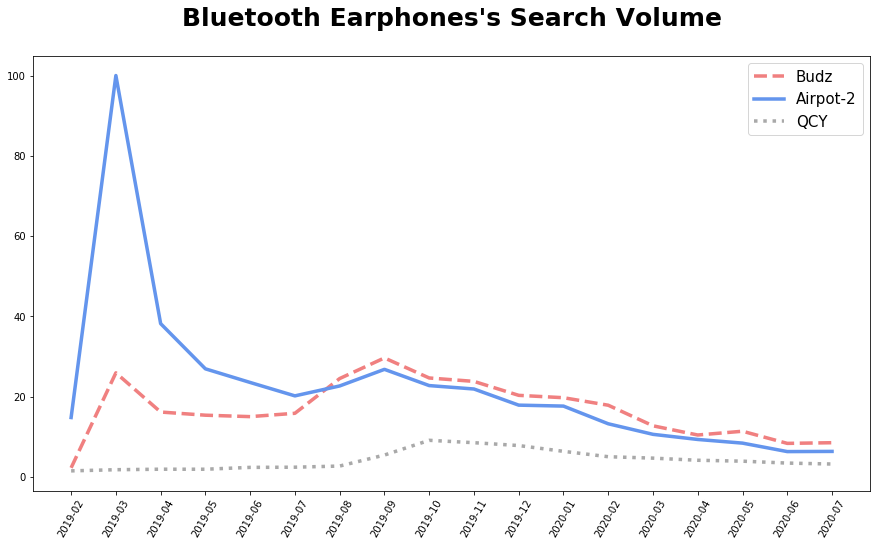

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(x, All["Budz"], color='#F08080', linestyle='--', linewidth = 3.5)
plt.plot(x, All["Airpot-2"], color='#6495ED', linewidth = 3.5)
plt.plot(x, All["QCY"], color='#A9A9A9', linestyle=':' ,linewidth = 3.5)

plt.legend(['Budz','Airpot-2','QCY'],fontsize=15)

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.title('Bluetooth Earphones\'s Search Volume',fontdict =title_font,loc='center', pad=30)


plt.xticks(rotation =60)

plt.show()

#  Budz만

In [564]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2019-02-01\",\"endDate\":\"2020-07-01\",\"timeUnit\":\"month\"\
,\"gender\":\"f\",\"keywordGroups\":[{\"groupName\":\"버즈\",\"keywords\":[\"버즈\",\"갤럭시버즈\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    scraped = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
    
result_f = json.loads(scraped)

In [565]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2019-02-01\",\"endDate\":\"2020-07-01\",\"timeUnit\":\"month\"\
,\"gender\":\"m\",\"keywordGroups\":[{\"groupName\":\"버즈\",\"keywords\":[\"버즈\",\"갤럭시버즈\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    scraped = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
    
result_m = json.loads(scraped)

In [566]:
num = len(result_m["results"][0]["data"])

BM = pd.DataFrame()
BM_temp = pd.DataFrame()
BM_temp = BM_temp.append({"period" : "", "Budz_M" : ""},ignore_index=True)

col1 = BM_temp.columns.get_loc("period")
col2 = BM_temp.columns.get_loc("Budz_M")

for i in range(0,num) :
    BM_temp.iat[0,col1] = result_m["results"][0]["data"][i]["period"]
    BM_temp.iat[0,col2] = result_m["results"][0]["data"][i]["ratio"]
        
        
    BM = BM.append(BM_temp,ignore_index=True)
    for k in range(0,len(BM_temp.columns)):
        BM_temp.iat[0,k] = ""
    
    
BM = BM[["period","Budz_M"]]   
BM = BM.set_index("period")

In [567]:
num = len(result_f["results"][0]["data"])

BFM = pd.DataFrame()
BFM_temp = pd.DataFrame()
BFM_temp = BFM_temp.append({"period" : "", "Budz_F" : ""},ignore_index=True)

col1 = BFM_temp.columns.get_loc("period")
col2 = BFM_temp.columns.get_loc("Budz_F")

for i in range(0,num) :
    BFM_temp.iat[0,col1] = result_f["results"][0]["data"][i]["period"]
    BFM_temp.iat[0,col2] = result_f["results"][0]["data"][i]["ratio"]
        
        
    BFM = BFM.append(BFM_temp,ignore_index=True)
    for k in range(0,len(BFM_temp.columns)):
        BFM_temp.iat[0,k] = ""
    
    
BFM = BFM[["period","Budz_F"]]   
BFM = BFM.set_index("period")

In [568]:
BB =  pd.DataFrame()
BB = pd.merge(BM, BFM, on ="period")

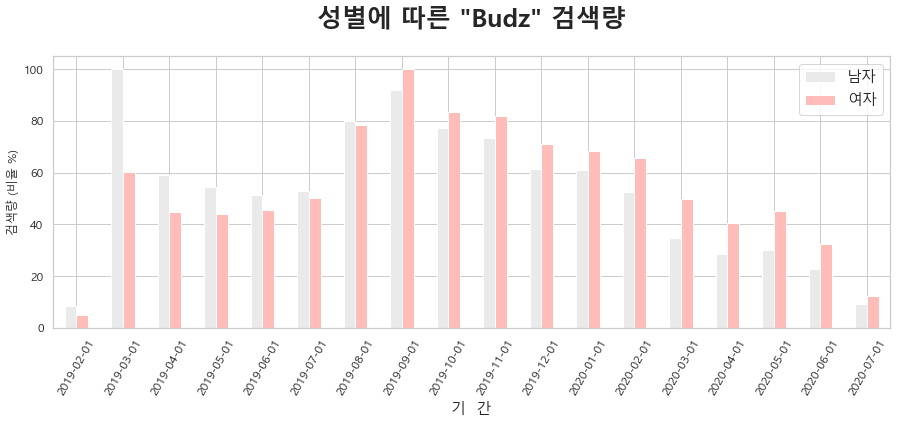

In [569]:
font_name = mpl.font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font',family=font_name)
ax = BB.plot(kind='bar', figsize=(15, 5), legend=True, fontsize=12, color = ['#eaeaea',"#ffbcb9"])
ax.legend(['남자', '여자'], fontsize=15) 
ax.set_xlabel('기  간', fontsize=15)          # x축 정보 표시
ax.set_ylabel('검색량 (비율 %)', fontsize=12) 

plt.title('성별에 따른 \"Budz" 검색량',fontdict =title_font,loc='center', pad=30)

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.xticks(rotation =60)
plt.show()

# AIrpot- 2만

In [570]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2019-02-01\",\"endDate\":\"2020-07-01\",\"timeUnit\":\"month\"\
,\"gender\":\"f\",\"keywordGroups\":[{\"groupName\":\"에어팟\",\"keywords\":[\"에어팟 2\",\"에어팟 2세대\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    scraped = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
    
result_f = json.loads(scraped)

In [571]:
num = len(result_f["results"][0]["data"])

AFM = pd.DataFrame()
AFM_temp = pd.DataFrame()
AFM_temp = AFM_temp.append({"period" : "", "Airpot_F" : ""},ignore_index=True)

col1 = AFM_temp.columns.get_loc("period")
col2 = AFM_temp.columns.get_loc("Airpot_F")

for i in range(0,num) :
    AFM_temp.iat[0,col1] = result_f["results"][0]["data"][i]["period"]
    AFM_temp.iat[0,col2] = result_f["results"][0]["data"][i]["ratio"]
        
        
    AFM = AFM.append(AFM_temp,ignore_index=True)
    for k in range(0,len(AFM_temp.columns)):
        AFM_temp.iat[0,k] = ""
    
    
AFM = AFM[["period","Airpot_F"]]   
AFM = AFM.set_index("period")

In [572]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2019-02-01\",\"endDate\":\"2020-07-01\",\"timeUnit\":\"month\"\
,\"gender\":\"m\",\"keywordGroups\":[{\"groupName\":\"에어팟\",\"keywords\":[\"에어팟 2\",\"에어팟 2세대\"]}]}"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    scraped = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)
    
result_m = json.loads(scraped)

In [573]:
num = len(result_m["results"][0]["data"])

AM = pd.DataFrame()
AM_temp = pd.DataFrame()
AM_temp = AM_temp.append({"period" : "", "Airpot_M" : ""},ignore_index=True)

col1 = AM_temp.columns.get_loc("period")
col2 = AM_temp.columns.get_loc("Airpot_M")

for i in range(0,num) :
    AM_temp.iat[0,col1] = result_m["results"][0]["data"][i]["period"]
    AM_temp.iat[0,col2] = result_m["results"][0]["data"][i]["ratio"]
        
        
    AM = AM.append(AM_temp,ignore_index=True)
    for k in range(0,len(AM_temp.columns)):
        AM_temp.iat[0,k] = ""
    
    
AM = AM[["period","Airpot_M"]]   
AM = AM.set_index("period")

In [574]:
AA =  pd.DataFrame()
AA = pd.merge(AM, AFM, on ="period")

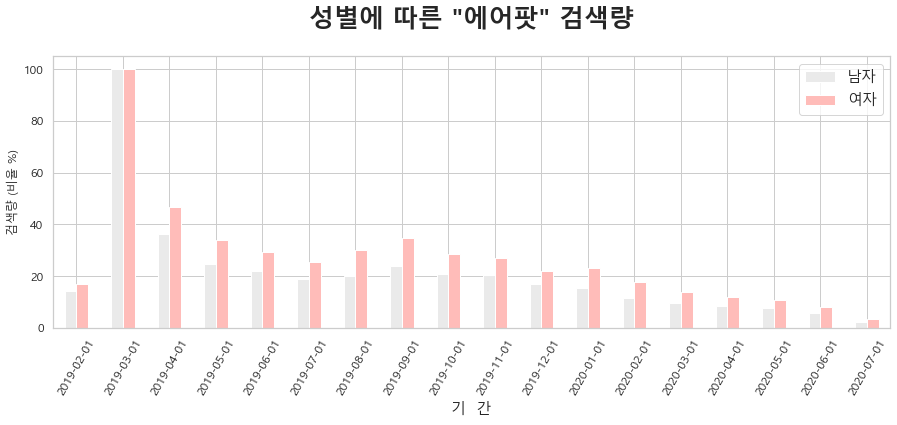

In [575]:
font_name = mpl.font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font',family=font_name)
ax = AA.plot(kind='bar', figsize=(15, 5), legend=True, fontsize=12, color = ['#eaeaea',"#ffbcb9"])
ax.legend(['남자', '여자'], fontsize=15) 
ax.set_xlabel('기  간', fontsize=15)          # x축 정보 표시
ax.set_ylabel('검색량 (비율 %)', fontsize=12) 

plt.title('성별에 따른 \"에어팟" 검색량',fontdict =title_font,loc='center', pad=30)

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}
plt.xticks(rotation =60)
plt.show()

# 11번가 Budz 후기 크롤링

In [576]:
# 전체 후기 개수 뽑아오기 위한 URL
URL_1 = "http://www.11st.co.kr/browsing/PreviewPop.tmall?method=getPreviewPop&prdNo=2341601848&reviewTab=Y%E2%80%8B"
res = requests.get(URL_1)     
soup = bs(res.text,'html.parser')
count_1= soup.find_all("ul")[0].find('span').text.replace("(","")
count = count_1.replace(")","")
count

'2061'

In [577]:
CntPage = int(count) // 50
CntPage = CntPage +2
CntPage

43

# STEP 01) 41 페이지의 50개만 

In [77]:
URL = "http://www.11st.co.kr/browsing/OpenContReviewAction.tmall?method=getProductReviewList&prdNo=2341601848&page=41&pageSize=50&isIgnoreAuth=false"
res = requests.get(URL)     
soup = bs(res.text,'html.parser')

In [78]:
len(soup.find("tbody").find_all("tr",attrs={'class': None}))

50

In [79]:
# 상세 후기 글귀 뽑아오기 ---> a의 개수가 너무 재각각...0/1/2
for i in range(0, len(soup.find("tbody").find_all("tr",attrs={'class': None}))) :
    print(i)
    print(soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a"))
    print("=============================")
    print(len(soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")))
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

0
[<a href="/browsing/OpenContReviewAction.tmall?method=getMyProfessionalReviewDetail&amp;contNo=138041616#prdAnker" target="_blank" title="새창으로열기">
<img alt="리뷰이미지" height="80" onerror="this.src='https://s.011st.com/img/product/no_image_80.gif';" src="https://i.011st.com/t/080/review/41409102/2341601848/c34048ceff444bfbbdea3fa824fdc946.JPG" width="80"/>
</a>, <a data-contno="138041616" data-page="41" href="#" id="goReviewDetail">
													딸래미가 무선이어폰을 검색하고 있길래 사용하는 핸드폰은아이폰이지만 삼성을 적극적으로 추천했어요~에어팟을 사용하는걸 많이봤는데 글쎄요...개인적으로 많이 예쁘다는 생각이 안들더라
												</a>]
2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
1
[<a href="/browsing/OpenContReviewAction.tmall?method=getMyProfessionalReviewDetail&amp;contNo=138033450#prdAnker" target="_blank" title="새창으로열기">
<img alt="리뷰이미지" height="80" onerror="this.src='https://s.011st.com/img/product/no_image_80.gif';" src="https://i.011st.com/t/080/ex_t/R/280x280/0/75/1/src/review/41409102/2341601848/5dfda07

In [80]:
soup.find("tbody").find_all("tr",attrs={'class': None})[16].find_all("a")[0].text

'\n\t\t\t\t\t\t\t\t\t\t\t\t\t아직 쓰기전이긴하지만 조금만작동해받지만 좋은것같아요\n\t\t\t\t\t\t\t\t\t\t\t\t'

In [81]:
soup.find_all("tr")[6].find_all("a")[0].text.strip()

''

In [82]:
# 쓰레기 값
soup.find_all("tr")[24].get("class") == ['trReview']

True

In [83]:
# 후기 등록 날짜
soup.find("tbody").find_all("tr",attrs={'class': None})[1].find("span",class_="date").text

'2019-04-13'

In [84]:
# 별점
soup.find("tbody").find_all("tr",attrs={'class': None})[1].find("strong").text

'좋아요'

In [85]:
# 상세 후기 글귀
soup.find("tbody").find_all("tr",attrs={'class': None})[1].find_all("a")[1].text.strip()

'제품 좋아요. 배송도 빠르고 선명합니다. 제 귀에 딱 맞으면 좋겠지만, 조금은 귀에서 떨어질가봐 불안하네요. 제가 무식해서 휴대폰 충전기로 충전이 될 줄알았는데 충전이 안되네요'

In [86]:
DF = pd.DataFrame()

DDF = pd.DataFrame()
DDF = DDF.append({"Star":"", "Strong":"","Comment":"","Date":"","Y-M":""},ignore_index=True)

num = len(soup.find("tbody").find_all("tr",attrs={'class': None}))
print(num)

col1 = DDF.columns.get_loc("Star")
col2 = DDF.columns.get_loc("Strong")
col3 = DDF.columns.get_loc("Comment")
col4 = DDF.columns.get_loc("Date")
col5 = DDF.columns.get_loc("Y-M")

for i in range(1,num):
        DDF.iat[0,col1] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span").text.strip()
        DDF.iat[0,col2] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("strong").text
        DDF.iat[0,col4] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span",class_="date").text
        DDF.iat[0,col5] = (soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span",class_="date").text)[0:7]
        if len(soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")) == 2 :
            DDF.iat[0,col3] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")[1].text.strip()
        elif len(soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")) == 1 :
            DDF.iat[0,col3] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")[0].text.strip()
        else :
            continue


        DF = DF.append(DDF,ignore_index=True)


        for j in range(0,len(DDF.columns)):
            DDF.iat[0,j] = ""
    


DF[["Star","Strong","Comment","Date","Y-M"]]




50


,Star,Strong,Comment,Date,Y-M
0,추천,좋아요,"제품 좋아요. 배송도 빠르고 선명합니다. 제 귀에 딱 맞으면 좋겠지만, 조금은 귀에...",2019-04-13,2019-04
1,적극추천,최고예요,소리아주좋아요,2019-04-13,2019-04
2,적극추천,최고예요,오....줄이없다는거에 엄청난 신세계를 느끼고있습니다.더불어 음질도 나쁘지 않구요....,2019-04-12,2019-04
3,적극추천,최고예요,,2019-04-12,2019-04
4,적극추천,최고예요,,2019-04-12,2019-04
5,보통,보통이에요,,2019-04-11,2019-04
6,적극추천,최고예요,좋은 가격에 좋은 상품 잘 받았습니다.^^,2019-04-09,2019-04
7,적극추천,최고예요,배송시간과 품질에 아주 만족합니다!!,2019-04-06,2019-04
8,적극추천,최고예요,새벽에 시켰는데 그 다음날 점심 때 도착했어요. 검정색 귀지 많이 낍니다 참고하세요ㅋㅋㅋ,2019-04-06,2019-04
9,적극추천,최고예요,배송매우 빠르고좋습니다. 삼성공홈에서도 하루만에 배송못해주는제품을 하루만에받았습니다...,2019-04-04,2019-04


# STEP 02) 전체 후기 2061개 

In [578]:
DF = pd.DataFrame()

DDF = pd.DataFrame()
DDF = DDF.append({"Star":"", "Strong":"","Comment":"","Date":"","Y-M":""},ignore_index=True)



col1 = DDF.columns.get_loc("Star")
col2 = DDF.columns.get_loc("Strong")
col3 = DDF.columns.get_loc("Comment")
col4 = DDF.columns.get_loc("Date")
col5 = DDF.columns.get_loc("Y-M")



for p in range(1,CntPage):
    # 페이지 마다 URL 생성
    URL = "http://www.11st.co.kr/browsing/OpenContReviewAction.tmall?method=getProductReviewList&prdNo=2341601848"
    page = "&page=" + str(p)
    page_s = "&pageSize=50&isIgnoreAuth=false"
    URL_2 = URL + page + page_s
    res = requests.get(URL_2)     
    soup = bs(res.text,'html.parser')
    
    num = len(soup.find("tbody").find_all("tr",attrs={'class': None}))
    for i in range(0,num):
        DDF.iat[0,col1] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span").text.strip()
        DDF.iat[0,col2] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("strong").text
        DDF.iat[0,col4] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span",class_="date").text
        DDF.iat[0,col5] = (soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span",class_="date").text)[0:7]
        if len(soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")) == 2 :
            DDF.iat[0,col3] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")[1].text.strip()
        else:
            DDF.iat[0,col3] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")[0].text.strip()

        DF = DF.append(DDF,ignore_index=True)


        for j in range(0,len(DDF.columns)):
            DDF.iat[0,j] = ""
    


DF[["Star","Strong","Comment","Date","Y-M"]]



,Star,Strong,Comment,Date,Y-M
0,추천,좋아요,빠른배송 고품질 음향 맘에 들어요.다른 회원님께 추천 드립니다.,2020-05-19,2020-05
1,적극추천,최고예요,여기저기 소문듣고 구입했는데 사길 잘한듯 만족합니다,2020-05-16,2020-05
2,적극추천,최고예요,흰색이라 때가 조금 잘타지만 만족합니다 갤럭시유저라면 최고,2020-04-20,2020-04
3,적극추천,최고예요,쿠폰써서 저렴하게 샀어요몇달 썼는데 다행이도 아직까지 문제는 없었어요,2020-04-14,2020-04
4,적극추천,최고예요,버즈 음질도 좋고 아주 죽입니다. 많이 파세요.,2020-04-04,2020-04
...,...,...,...,...,...
2054,적극추천,최고예요,,2019-03-27,2019-03
2055,적극추천,최고예요,좋아요좋아요좋아요,2019-03-27,2019-03
2056,적극추천,최고예요,진짜 편하네요 배송 엄청 빨라서 좋았어요,2019-03-26,2019-03
2057,적극추천,최고예요,배송도 빠르고 좋아요 잘받았습니다.,2019-03-26,2019-03


# STEP 03) 별 개수 컬럼 생성

In [579]:
DF["Num_Star"] = ""

for i in range(0,len(DF)) :
    if DF.loc[i,"Strong"] == "최고예요":
        DF.loc[i,"Num_Star"]= 5
        
    elif DF.loc[i,"Strong"] == "좋아요" :
        DF.loc[i,"Num_Star"] = 4
        
    elif DF.loc[i,"Strong"] == "보통이에요":
         DF.loc[i,"Num_Star"] = 3
            
    elif DF.loc[i,"Strong"] == "별로예요":
         DF.loc[i,"Num_Star"] = 2
    else :
        DF.loc[i,"Num_Star"] = 1
        

In [580]:
DF[70:170]

,Comment,Date,Star,Strong,Y-M,Num_Star
70,배송속도는 보통인 것 같습니다. 동생 선물해줬는데 2가 나와서 아쉽긴하지만 그래도 ...,2020-04-23,적극추천,최고예요,2020-04,5
71,매우 만족 합니다.......................,2020-04-20,추천,좋아요,2020-04,4
72,중2 아들이 용돈모아 선택해서 주문해줬어요~평일은 힘들고 주말에 써요,2020-04-16,추천,좋아요,2020-04,4
73,가성비가 좋내요,2020-04-16,적극추천,최고예요,2020-04,5
74,,2020-04-15,적극추천,최고예요,2020-04,5
...,...,...,...,...,...,...
165,아이가 너무 좋아하네요. 성능도 만족하고요근데 싸게 샀지만기본 가격이 좀 비싸네요....,2020-02-15,추천,좋아요,2020-02,4
166,고딩 딸이 잘 사용하고 있어요. 소리도 잘 들리고 만족해 합니다.,2020-02-15,적극추천,최고예요,2020-02,5
167,상품 잘 받았습니다! 사용해보니 만족스러워요 디자인도 마음에 듭니다,2020-02-15,적극추천,최고예요,2020-02,5
168,,2020-02-14,추천,좋아요,2020-02,4


In [18]:
DF.to_csv("C:\\dev\\Budz_11st.csv", encoding="cp949")

# 11번가 Airpot 후기 크롤링


In [581]:
# 전체 후기 개수 뽑아오기 위한 URL
URL_1 = "http://www.11st.co.kr/browsing/PreviewPop.tmall?method=getPreviewPop&prdNo=2383161019&reviewTab=Y"
res = requests.get(URL_1)     
soup = bs(res.text,'html.parser')
count_1= soup.find_all("ul")[0].find('span').text.replace("(","")
count = count_1.replace(")","")
count

'5893'

In [582]:
CntPage = int(count) // 100
CntPage = CntPage +2
CntPage

60

In [583]:
AF = pd.DataFrame()

AAF = pd.DataFrame()
AAF = AAF.append({"Star":"", "Strong":"","Comment":"","Date":"","Y-M":""},ignore_index=True)



col1 = AAF.columns.get_loc("Star")
col2 = AAF.columns.get_loc("Strong")
col3 = AAF.columns.get_loc("Comment")
col4 = AAF.columns.get_loc("Date")
col5 = AAF.columns.get_loc("Y-M")


for p in range(1,CntPage):
    # 페이지 마다 URL 생성
    URL = "http://www.11st.co.kr/browsing/OpenContReviewAction.tmall?method=getProductReviewList&prdNo=2383161019"
    page = "&page=" + str(p)
    page_s = "&pageSize=100"
    URL_2 = URL + page + page_s
    res = requests.get(URL_2)     
    soup = bs(res.text,'html.parser')
    
    num = len(soup.find("tbody").find_all("tr",attrs={'class': None}))
    for i in range(0,num):
        var = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span",class_="date")
        AAF.iat[0,col1] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span").text.strip()
        
        AAF.iat[0,col2] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("strong").text  
        
        if len(soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")) == 2 :
            AAF.iat[0,col3] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")[1].text.strip()
        else:
            AAF.iat[0,col3] = soup.find("tbody").find_all("tr",attrs={'class': None})[i].find_all("a")[0].text.strip()

            
        if var is None :
            AAF.iat[0,col4] = "  "
            AAF.iat[0,col5] = ""
        else : 
            AAF.iat[0,col4] = var.text
            AAF.iat[0,col5] = (soup.find("tbody").find_all("tr",attrs={'class': None})[i].find("span",class_="date")).text[0:7]

        AF = AF.append(AAF,ignore_index=True)


        for j in range(0,len(AAF.columns)):
                           AAF.iat[0,j] = ""
    


AF[["Star","Strong","Comment","Date","Y-M"]]


,Star,Strong,Comment,Date,Y-M
0,적극추천,최고예요,원래 쿠*에서 사려고 했는데 제품이 중고 같다고 해서 11번가를 알아봤는데 가격 차...,2020-07-11,2020-07
1,추천,좋아요,음질이 상당히 깨끗하고 만족스럽습니다귀가 편안한것도 좋아요,2020-07-10,2020-07
2,보통,보통이에요,배송상태가 그리 맘에들진 않네요...ㅠㅠ,2020-07-09,2020-07
3,적극추천,최고예요,너무 가지고싶엇던거라 대만족입니다~!!!쒼나~~씐나~^^,2020-07-08,2020-07
4,적극추천,최고예요,잘 쓰고 있습니다 저 역시 쿠팡에서 사려다가 상품평이 좀 별로라 정신건강에 편하려고...,2020-07-08,2020-07
...,...,...,...,...,...
5884,적극추천,최고예요,잘받았어요,2019-04-20,2019-04
5885,적극추천,최고예요,네이버에서 시켰다가 한달기다리다 취소 후에 여기서 시켰는데 금요일에 주문해서 토요일...,2019-04-20,2019-04
5886,적극추천,최고예요,1쓰다가 2로 바꾸려고했는데 때마침 11번가에서 물량풀려서 바로 주문했습니다음질도 ...,2019-04-20,2019-04
5887,적극추천,최고예요,배송도 빨리오고 정품인증 구매한 날짜로 하니까 바로 되고요 ？청횬肩？ 잘 싸서 ...,2019-04-20,2019-04


In [586]:
AF["Num_Star"] = ""

for i in range(0,len(AF)) :
    if AF.loc[i,"Strong"] == "최고예요":
        AF.loc[i,"Num_Star"]= 5
        
    elif AF.loc[i,"Strong"] == "좋아요" :
        AF.loc[i,"Num_Star"] = 4
        
    elif AF.loc[i,"Strong"] == "보통이에요":
         AF.loc[i,"Num_Star"] = 3
            
    elif AF.loc[i,"Strong"] == "별로예요":
         AF.loc[i,"Num_Star"] = 2
    else :
        AF.loc[i,"Num_Star"] = 1

In [254]:
AF.tail()

,Comment,Date,Star,Strong,Y-M,Num_Star
5878,잘받았어요,2019-04-20,적극추천,최고예요,2019-04,5
5879,네이버에서 시켰다가 한달기다리다 취소 후에 여기서 시켰는데 금요일에 주문해서 토요일...,2019-04-20,적극추천,최고예요,2019-04,5
5880,1쓰다가 2로 바꾸려고했는데 때마침 11번가에서 물량풀려서 바로 주문했습니다음질도 ...,2019-04-20,적극추천,최고예요,2019-04,5
5881,배송도 빨리오고 정품인증 구매한 날짜로 하니까 바로 되고요 ？청횬肩？ 잘 싸서 ...,2019-04-20,적극추천,최고예요,2019-04,5
5882,"제품 주문하고 배송 엄청 빨리 받았네요.통화,음악 음질 최고에요.에어팟 비싸지만 ...",2019-04-20,적극추천,최고예요,2019-04,5


In [142]:
AF.to_csv("C:\\dev\\Airpot-2_11st.csv", encoding="cp949")

In [826]:
AF["Num_Star"]=pd.to_numeric(AF['Num_Star'])

In [827]:
AF["Y-M"].value_counts()
grouped =  AF["Num_Star"].groupby(AF["Y-M"])
AS =grouped.mean() 

In [828]:
AFS = pd.DataFrame()
AFS["mean"] = AS
AFS["count"] = AF["Y-M"].value_counts()
AFS.drop(AFS[AFS["mean"]==4.0].index,inplace=True)

In [829]:
AFS

,mean,count
Y-M,,
2019-04,4.852713,129
2019-05,4.757576,528
2019-06,4.747170,530
2019-07,4.681818,396
2019-08,4.694226,762
2019-09,4.578853,558
2019-10,4.675373,536
2019-11,4.720430,558
2019-12,4.702381,336


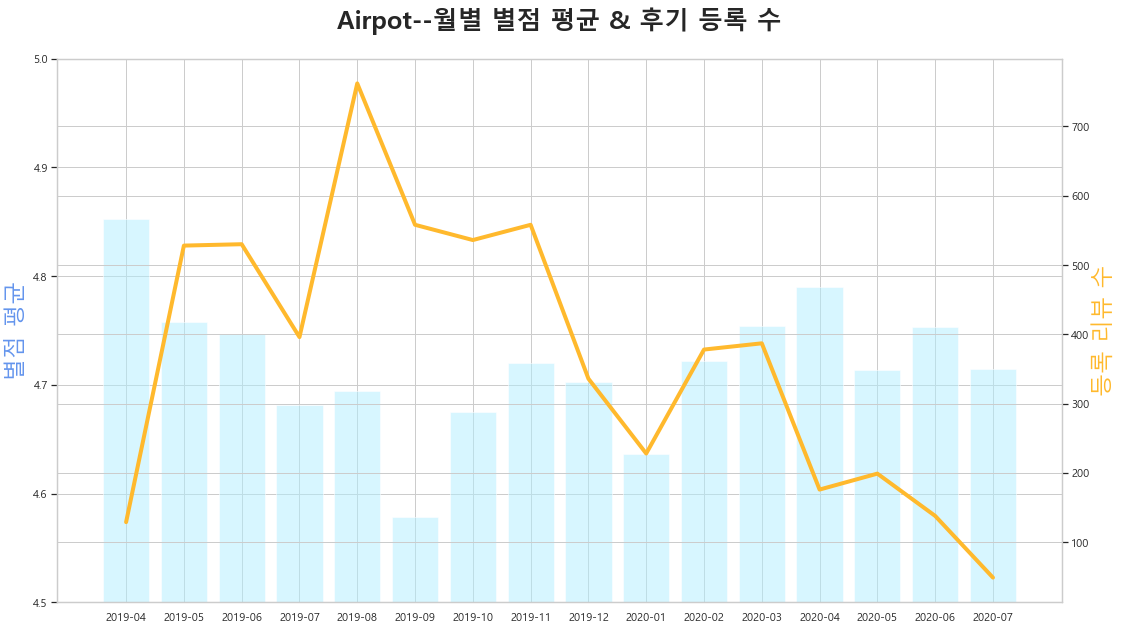

In [628]:

x=AFS.index
y1 = AFS["mean"]
y2 = AFS["count"]

fig, ax1 = plt.subplots()
fig.set_size_inches(18,10)

ax2 = ax1.twinx()
ax1.bar(x, y1,color= "#b1eeff" ,alpha=0.5)
ax1.set_ylim(4.5,5)
ax2.plot(x, y2, '#ffb92d',linewidth = 4)

ax1.set_ylabel('별점 평균', color='#6495ED' , fontsize = 23)
ax2.set_ylabel('등록 리뷰 수', color='#ffb92d',fontsize = 23)


plt.title('Airpot--월별 별점 평균 & 후기 등록 수',fontdict =title_font,loc='center', pad=30)

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}

plt.show()

In [593]:
DF["Num_Star"]=pd.to_numeric(DF['Num_Star'])
DF["Y-M"].value_counts()
grouped =  DF["Num_Star"].groupby(DF["Y-M"])
BS =grouped.mean() 
BFS = pd.DataFrame()
BFS["mean"] = BS
BFS["count"] = DF["Y-M"].value_counts()
BFS.drop(BFS[BFS["mean"]==4.0].index,inplace=True)

In [639]:
BFS

,mean,count
Y-M,,
2019-03,4.857143,28
2019-04,4.753425,73
2019-05,4.743083,253
2019-06,4.663158,95
2019-07,4.717172,99
2019-08,4.707317,205
2019-09,4.714286,126
2019-10,4.838028,142
2019-11,4.669903,412


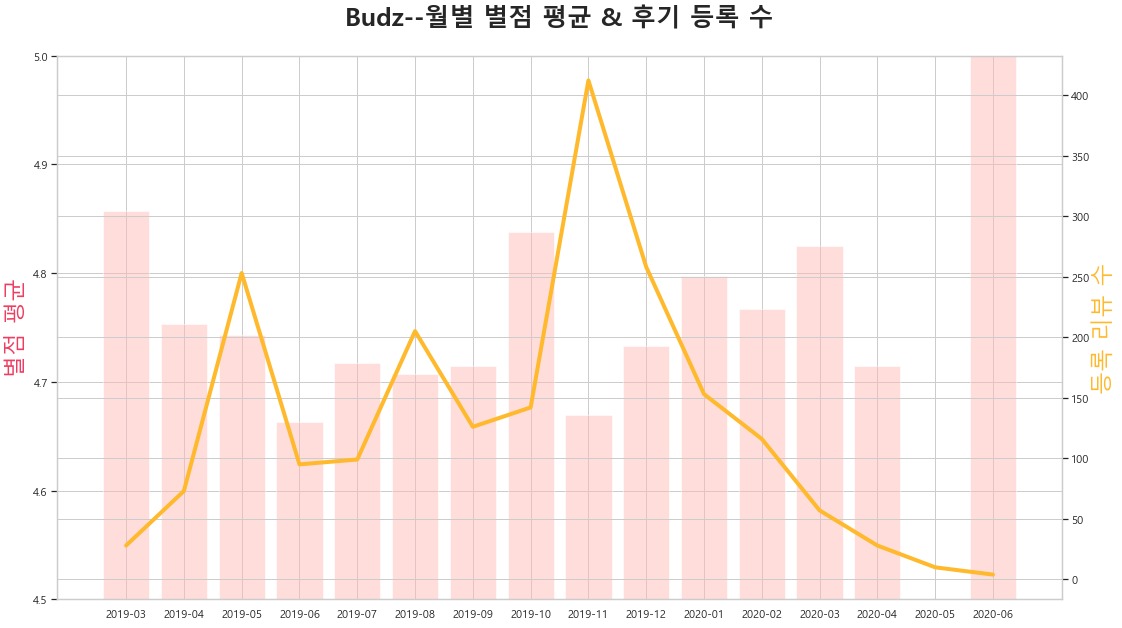

In [644]:

x=BFS.index
y1 = BFS["mean"]
y2 = BFS["count"]

fig, ax1 = plt.subplots()
fig.set_size_inches(18,10)

ax2 = ax1.twinx()
ax1.bar(x, y1,color= "#ffbcb9" ,alpha=0.5)
ax1.set_ylim(4.5,5)
ax2.plot(x, y2, '#ffb92d',linewidth = 4)

ax1.set_ylabel('별점 평균', color= "#ee3e61", fontsize = 23)
ax2.set_ylabel('등록 리뷰 수', color='#ffb92d',fontsize = 23)


plt.title('Budz--월별 별점 평균 & 후기 등록 수',fontdict =title_font,loc='center', pad=30)

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}

plt.show()

In [849]:
AFS.index[0:15]

Index(['2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06'],
      dtype='object', name='Y-M')

In [855]:
AFS1=AFS[0:14]
BFS1=BFS[1:15]
result = pd.merge(AFS1,BFS1, on =AFS1.index)# x가 에어팟 y가 버즈
result

,key_0,mean_x,count_x,mean_y,count_y
0,2019-04,4.852713,129,4.753425,73
1,2019-05,4.757576,528,4.743083,253
2,2019-06,4.747170,530,4.663158,95
3,2019-07,4.681818,396,4.717172,99
4,2019-08,4.694226,762,4.707317,205
5,2019-09,4.578853,558,4.714286,126
6,2019-10,4.675373,536,4.838028,142
7,2019-11,4.720430,558,4.669903,412
8,2019-12,4.702381,336,4.732558,258
9,2020-01,4.635965,228,4.797386,153


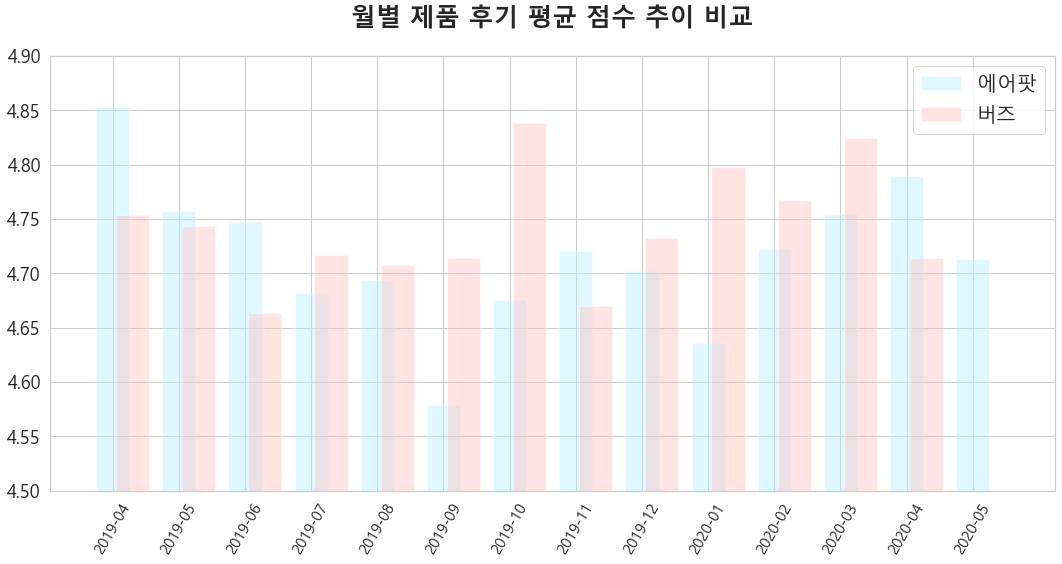

In [889]:
label = result["key_0"]
x = np.arange(len(label))

plt.figure(figsize=(18, 8))
plt.bar(x,result["mean_x"],label = "에어팟", width=0.5,color="#b1eeff",alpha=0.4)
plt.bar(x+0.3,result["mean_y"],label = "버즈", width=0.5,color="#ffbcb9",alpha=0.4)
plt.xticks(x,label,rotation=60,fontsize=15)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)
plt.ylim(4.5,4.9)
plt.title('월별 제품 후기 평균 점수 추이 비교',fontdict =title_font,loc='center', pad=30)

title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}

plt.show()

# STEP 04) 그래프...??

In [596]:
import pyecharts
print("pyecharts version : ", pyecharts.__version__)

pyecharts version :  0.5.8


In [597]:
St5 = sum(DF["Num_Star"] == 5) *(100/2059)
St4 = sum(DF["Num_Star"] == 4)*(100/2059)
St3 = sum(DF["Num_Star"] == 3)*(100/2059)
St2 = sum(DF["Num_Star"] == 2)*(100/2059)
St1 = sum(DF["Num_Star"] == 1)*(100/2059)
BS = [St5, St4 , St3 , St2, St1]


In [598]:
St5 = sum(AF["Num_Star"] == 5) *(100/5883)
St4 = sum(AF["Num_Star"] == 4) *(100/5883)
St3 = sum(AF["Num_Star"] == 3) *(100/5883)
St2 = sum(AF["Num_Star"] == 2)*(100/5883)
St1 = sum(AF["Num_Star"] == 1)*(100/5883)
num = St5 + St4 +  St3+ St2+ St1
AS = [St5, St4 , St3 , St2, St1]
print(num)

100.10198878123407


In [599]:
SF = pd.DataFrame({'Budz':BS, 'Airpot-2':AS},
                   index = ['5','4','3','2','1'])
SF

,Budz,Airpot-2
5,79.601748,79.058304
4,16.270034,15.893252
3,2.719767,3.178650
2,0.534240,0.713921
1,0.874211,1.257862


In [635]:
SF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 5 to 1
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Budz      5 non-null      float64
 1   Airpot-2  5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


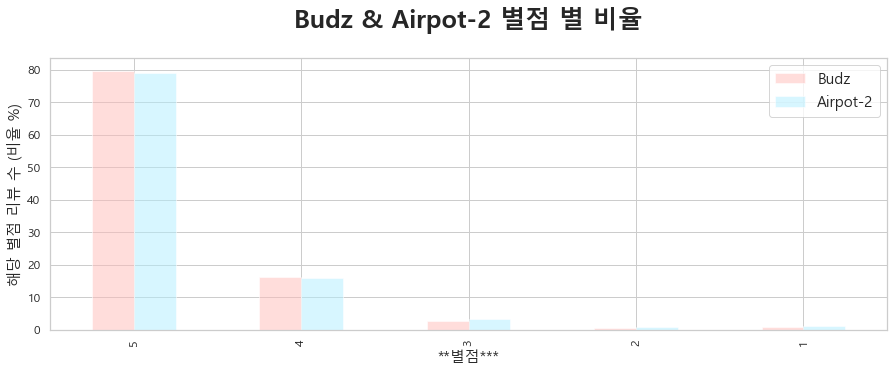

In [634]:
font_name = mpl.font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font',family=font_name)
ax = SF.plot(kind='bar', figsize=(15, 5), legend=True, fontsize=12, color = ["#ffbcb9","#b1eeff"],alpha=0.5)
ax.legend(['Budz', 'Airpot-2'], fontsize=15) 

ax.set_xlabel("**별점***", fontsize=15)          # x축 정보 표시
ax.set_ylabel('해당 별점 리뷰 수 (비율 %)', fontsize=15) 

plt.title('Budz & Airpot-2 별점 별 비율',  fontdict =title_font,loc='center', pad=30)
title_font = {
    'fontsize': 25,
    'fontweight': 'bold'
}

In [602]:
from pyecharts import Pie

attr = ['별5','별4','별3','별2','별1']
v1 = [1639, 335, 56, 11, 18]
v2 = [4636, 934, 187, 42, 74]

pie = Pie("별점 비교 : Budz vs Airpot-2", title_pos="center", width=900)

pie.add("Budz", attr, v1, center=[25, 50], is_label_show=True ,radius=[25,60],rosetype='radius',legend_color= '#fbceb1')
pie.add("Airpot-2", attr, v2, center=[75, 50],  radius=[25, 60], rosetype='radius',legend_orient='horizontal', legend_pos='left'
       ,is_label_show=True)
pie

# STEP 05) 단어 뽑아오기...???

In [807]:
from krwordrank.hangle import normalize

texts = DF["Comment"]
texts = [normalize(text, english=True, number=True) for text in texts]

In [808]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 2073
done = 10


In [809]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

     좋아요:	15.3158
      배송:	14.5972
      너무:	13.5293
      음질:	10.8109
      만족:	7.6655
     빠르고:	7.1606
      좋고:	6.1317
      버즈:	5.9109
     좋네요:	5.7413
      구매:	5.3361
      아주:	5.3266
    저렴하게:	5.3193
     갤럭시:	5.0833
    좋습니다:	5.0415
      정말:	4.7215
      많이:	4.6036
      사용:	4.4209
      제품:	4.1178
     이어폰:	3.8589
      좋은:	3.5627
      통화:	3.3970
      바로:	3.3404
      삼성:	3.2912
      매우:	3.2788
      선물:	3.2657
      역시:	3.2286
      싸게:	3.1734
      가격:	3.1234
      조금:	3.0646
      귀에:	3.0543


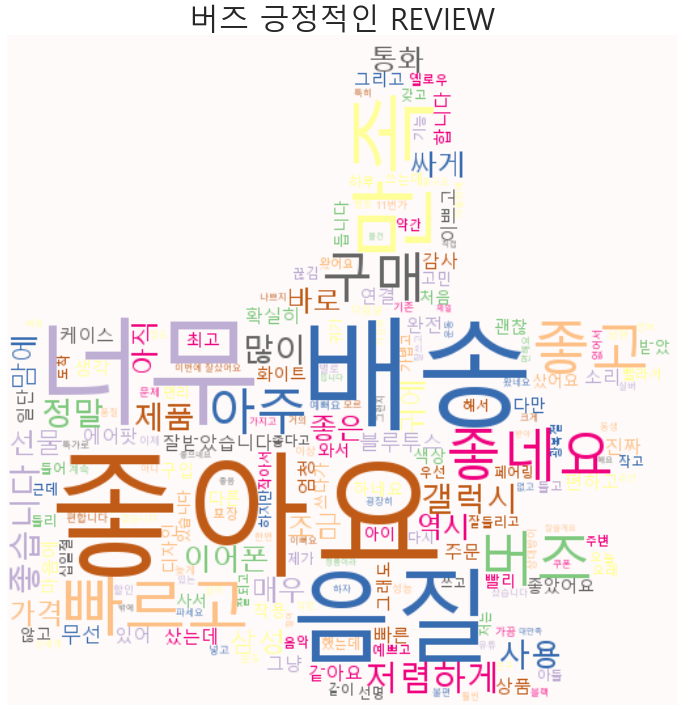

In [812]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import matplotlib.image as mpimg


#keywords.pop('너무')
#keywords.pop('남편')

icon = Image.open("C:/dev/like.png")
mask1 = Image.new("RGB", icon.size,(255,255,255))
mask1.paste(icon,icon)
mask1 = np.array(mask1)


wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='#fffafa', \
                      colormap = "Accent_r",width=1000, height=500, mask =mask1)

wordcloud = wordcloud.generate_from_frequencies(keywords)

plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("버즈 긍정적인 REVIEW",fontsize=30)
plt.show()





In [814]:
rv = pd.DataFrame
rv = DF[(DF["Num_Star"]==2)|(DF["Num_Star"]==1)]["Comment"]
rv

61                  어우....이거 살 돈으로 에어팟 사는게 더욱 더 이득이라고 봅니다
385         통화중 지직거리고 기계음이 발생해 이틀만에 서비스센터 가서 불량 교품 받았습니다.
651                                통화용으로 구매했는데 최악입니다.....
662                      통 밖에 붙어있어야 할 봉인라벨을 통안에 넣어서 배송해줌.
666                                                      
748     3시 이전 주문이면 당일 배송인데 당일 배송 안함.문의 남겼는데 씹다가 2일 뒤에 ...
821     택배박스 받고 하던일이 있어서 나중에 박스를 확인하였는데, 보자마자 또다시 화가 치...
841                                           배송 느림 느림 느림
844     개봉시 반품불가라는 문자도 미리보내고박스에도잔뜩적혀있는데정작 개봉해서 반갈라져있는 ...
912     장점: 삼성 제품이다 삼성 갤럭시 폰 및 워치 등 갤럭시 디바이스 제품을 사용하는 ...
925                                                      
926                                                      
1099    QCY 부터 시작된 블루투스 이어폰 사용이 오늘 수령한 버즈로 3번째인데 일단 디자...
1207                            별하나도아까워요 온지3일만에 서비스들어가습니다
1281    다른데보다 싸게사서 처음에는 만족하고 썼는데 일주일도안돼서 소리에 문제가 있네요.....
1358    10일사용후기입니다...하...우선주변소리듣기..양쪽다착용했을때가능합니다...  한...
1365    버즈와 키링을 동시에 구매했습니다.키링은 뚜껑이  닫히지 않고 엉성하기에 환불을 요...
1387          

In [815]:
texts = rv
texts = [normalize(text, english=True, number=True) for text in texts]
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 232
done = 10


In [816]:
icon = Image.open("C:/dev/dislike.png")
mask2 = Image.new("RGB", icon.size,(255,255,255))
mask2.paste(icon,icon)
mask2 = np.array(mask2)


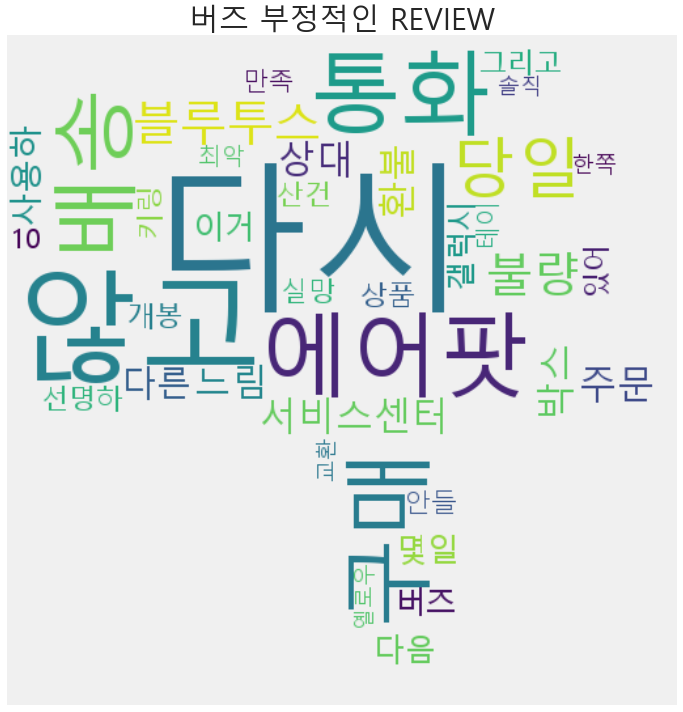

In [817]:
keywords.pop('소리가')
keywords.pop('제품')
keywords.pop('그래도')
keywords.pop('해놓고')
keywords.pop('삼성')
keywords.pop('너무')


wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='#f0f0f0', \
                      width=2000, height=2000,mask=mask2)


wordcloud = wordcloud.generate_from_frequencies(keywords)

plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("버즈 부정적인 REVIEW", fontsize=30)
plt.show()


scan vocabs ... 
num vocabs = 4672
done = 10 Early stopped.


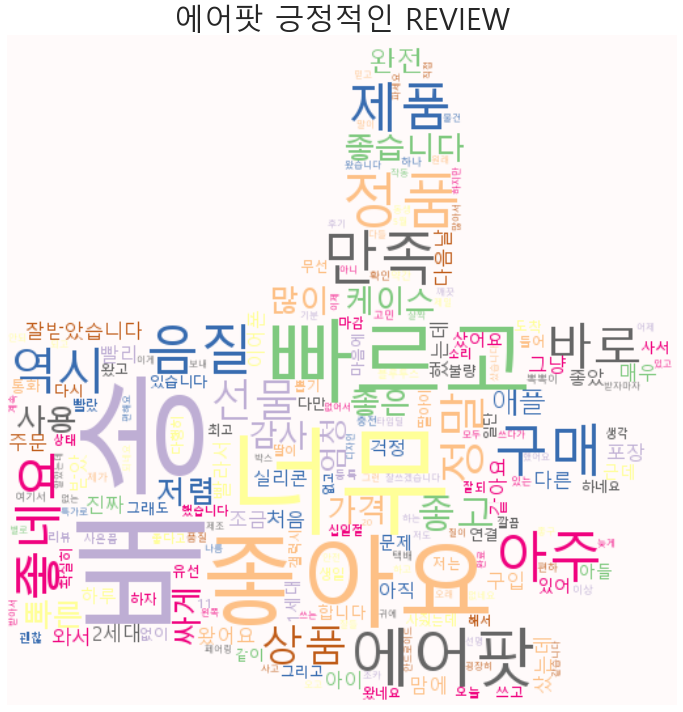

In [818]:
texts = AF["Comment"]
texts = [normalize(text, english=True, number=True) for text in texts]
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)


wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='#fffafa', \
                      colormap = "Accent_r",width=1000, height=500, mask =mask1)

wordcloud = wordcloud.generate_from_frequencies(keywords)

plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("에어팟 긍정적인 REVIEW",fontsize=30)
plt.show()

In [820]:
rv2 = pd.DataFrame
rv2 = AF[(AF["Num_Star"]==2)|(AF["Num_Star"]==1)]["Comment"]
texts = rv2
texts = [normalize(text, english=True, number=True) for text in texts]
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 1060
done = 10


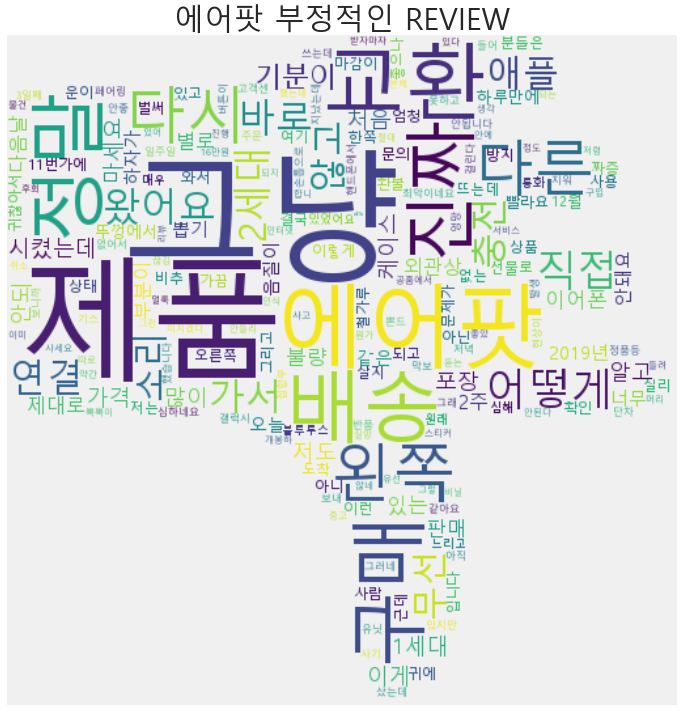

In [822]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='#f0f0f0', \
                      width=2000, height=2000,mask=mask2)


wordcloud = wordcloud.generate_from_frequencies(keywords)

plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("에어팟 부정적인 REVIEW", fontsize=30)
plt.show()
